# Import Library

In [1]:
import pandas as pd
import numpy as np
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from keras.layers import Input
from keras.layers import Reshape
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline

/Users/taeyoungkim/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-12-13 23:44:36.243735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Define Function

In [2]:
# Handcrafted function definition
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def confusionMatrix(modelInput, feature, label, classInfo=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]):
    pred = modelInput.predict(feature)
    cnf_matrix = confusion_matrix(np.argmax(label, axis=1), np.argmax(pred, axis=1))
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classInfo, normalize=False, title='')
    plt.show()

# Load Dataset

In [4]:
dataset_csv = pd.read_csv('./dbids_train_labeled.csv', header=None, skiprows=1)

In [5]:
print(dataset_csv.shape)
dataset_csv

(11000, 278)


,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
0,1,1,424,4,4,1140883472,0,0,0,0,...,0,0,0,0,0,0,5,19,1,5
1,1,1,284,5,1,67108864,0,0,0,0,...,0,0,0,0,0,0,3,19,1,3
2,1,1,395,6,4,1073777664,0,0,0,0,...,0,0,0,0,0,0,5,0,0,6
3,1,1,316,4,2,2064,0,0,0,0,...,0,0,0,0,0,0,3,0,0,4
4,1,1,423,4,3,1073743888,0,0,0,0,...,0,0,0,0,0,0,5,57,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,11,2,105,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,38,2,0
10996,11,3,110,2,1,512,0,0,0,0,...,0,0,0,0,0,0,0,19,1,2
10997,11,3,88,2,1,8,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
10998,11,4,80,0,1,1024,0,0,0,0,...,0,0,0,0,0,0,1,19,1,1


In [6]:
#Convert Pandas to Numpy
dataset = np.zeros((dataset_csv.shape[0], dataset_csv.shape[1])) 

for i in range(dataset_csv.shape[0]):
    dataset[i] = dataset_csv.iloc[i, 0:]

print(dataset.shape)
#Random Shuffle
np.random.shuffle(dataset)

(11000, 278)


In [7]:
dataset_temp = dataset[:, 0:273]

In [8]:
print(dataset_temp.shape)

(11000, 273)


# Split Train & Test Set

In [9]:
data_value = np.zeros((dataset_temp.shape[0], dataset_temp.shape[1]-1)) 
data_label = np.zeros((dataset_temp.shape[0], 1)) # Enpty array
print(data_value.shape)
print(data_label.shape)

for i in range(dataset_temp.shape[0]):
    data_value[i]= dataset_temp[i][1::] # Pixel value  
    data_label[i]= dataset_temp[i][0] # Data label

(11000, 272)
(11000, 1)


In [10]:
# 데이터를 9:1 비율로 훈련 데이터와 테스트 데이터로 분할
# 위 코드에서 이미 Shuffle 완료함
X_train, X_test = train_test_split(data_value, test_size=0.2, shuffle=False)
Y_train, Y_test = train_test_split(data_label, test_size=0.2, shuffle=False)

In [11]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8800, 272) (8800, 1)
(2200, 272) (2200, 1)


# One-Hot Encoding

In [12]:
Y_train -= 1
Y_test -= 1

Y_train, Y_test = to_categorical(Y_train), to_categorical(Y_test)
print(Y_train.shape)
print(Y_test.shape)

(8800, 11)
(2200, 11)


In [13]:
Y_train = np.reshape(Y_train, (Y_train.shape[0], Y_train.shape[1]))
Y_test = np.reshape(Y_test, (Y_test.shape[0], Y_test.shape[1]))

In [14]:
print(Y_train.shape)
print(Y_test.shape)

(8800, 11)
(2200, 11)


In [15]:
X_train.shape

(8800, 272)

In [16]:
X_train_2d = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]//17, 17))
X_test_2d = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]//17, 17))
print(X_train_2d.shape)
print(X_test_2d.shape)

(8800, 16, 17)
(2200, 16, 17)


# Convolutional Neural Network

In [17]:
cl_input = Input(shape=(X_train_2d.shape[1:]))
H = Reshape((X_train_2d.shape[1], X_train_2d.shape[2], 1))(cl_input)
H = Convolution2D(filters=128, kernel_size=(2, 2), padding='same', activation='tanh')(H)
H = MaxPooling2D(pool_size=(2,2), strides = 1, padding='same')(H) 
H = Convolution2D(filters=128, kernel_size=(2, 2), padding='same', activation='tanh')(H)
H = MaxPooling2D(pool_size=(2,2), strides = 1, padding='same')(H) 
H = Reshape((1, (int)(H.shape[1]*H.shape[2])*128))(H)
H = LSTM(128, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False)(H)
H = Dense(32)(H)
cl_output = Dense(11, activation='softmax')(H)
model_clstm = Model(cl_input, cl_output)
model_clstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 17)]          0         
                                                                 
 reshape (Reshape)           (None, 16, 17, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 16, 17, 128)       640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 17, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 17, 128)       65664     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 17, 128)       0         
 g2D)                                                        

In [18]:
model_clstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history_model_clstm = model_clstm.fit(X_train_2d, Y_train, validation_data=(X_test_2d, Y_test), epochs=30, batch_size=512, verbose=2, shuffle=True)

Train on 8800 samples, validate on 2200 samples


2023-12-13 23:44:41.978872: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2023-12-13 23:44:42.042654: W tensorflow/c/c_api.cc:305] Operation '{name:'training/Adam/dense/bias/v/Assign' id:875 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense/bias/v, training/Adam/dense/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 1/30


/Users/taeyoungkim/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-12-13 23:44:53.502429: W tensorflow/c/c_api.cc:305] Operation '{name:'loss/mul' id:554 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_1_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


8800/8800 - 12s - loss: 0.9564 - acc: 0.6748 - val_loss: 0.4559 - val_acc: 0.8305 - 12s/epoch - 1ms/sample
Epoch 2/30
8800/8800 - 12s - loss: 0.3627 - acc: 0.8637 - val_loss: 0.3325 - val_acc: 0.8645 - 12s/epoch - 1ms/sample
Epoch 3/30
8800/8800 - 12s - loss: 0.2849 - acc: 0.8867 - val_loss: 0.2998 - val_acc: 0.8773 - 12s/epoch - 1ms/sample
Epoch 4/30
8800/8800 - 13s - loss: 0.2610 - acc: 0.8924 - val_loss: 0.2837 - val_acc: 0.8732 - 13s/epoch - 2ms/sample
Epoch 5/30
8800/8800 - 14s - loss: 0.2439 - acc: 0.8956 - val_loss: 0.2672 - val_acc: 0.8805 - 14s/epoch - 2ms/sample
Epoch 6/30
8800/8800 - 15s - loss: 0.2228 - acc: 0.9061 - val_loss: 0.2562 - val_acc: 0.8823 - 15s/epoch - 2ms/sample
Epoch 7/30
8800/8800 - 14s - loss: 0.2234 - acc: 0.9082 - val_loss: 0.2610 - val_acc: 0.8900 - 14s/epoch - 2ms/sample
Epoch 8/30
8800/8800 - 14s - loss: 0.2139 - acc: 0.9116 - val_loss: 0.2365 - val_acc: 0.8868 - 14s/epoch - 2ms/sample
Epoch 9/30
8800/8800 - 13s - loss: 0.1956 - acc: 0.9199 - val_loss:

# Model Evaluation

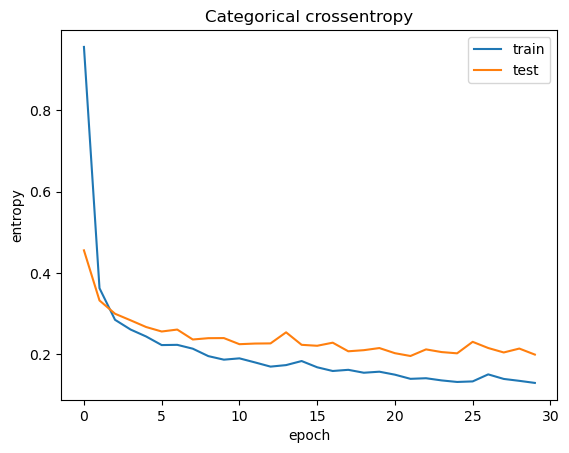

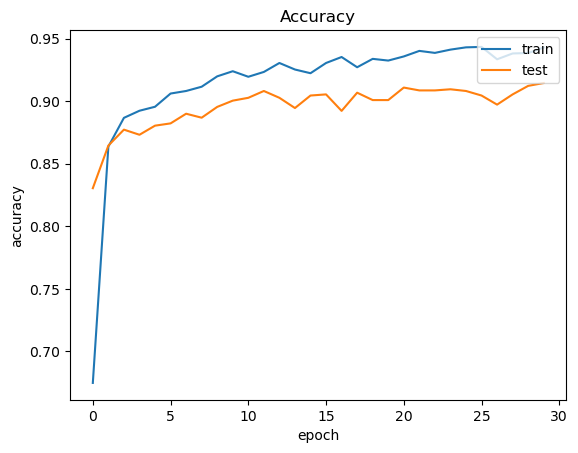

In [19]:
# Model evaluate
history = model_clstm.history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Categorical crossentropy')
plt.ylabel('entropy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

/Users/taeyoungkim/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-12-13 23:51:33.301341: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_1/Softmax' id:478 op device:{requested: '', assigned: ''} def:{{{node dense_1/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


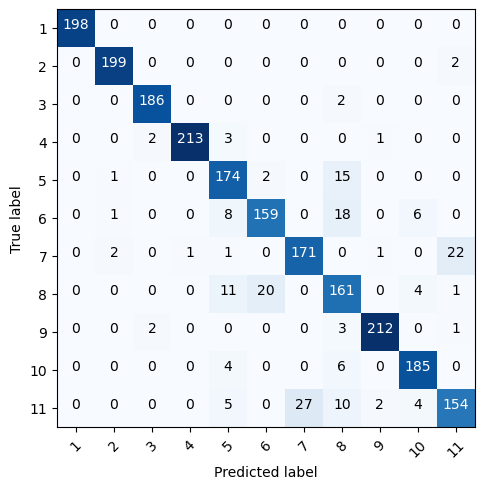

In [20]:
# Confusion matrix
label = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
confusionMatrix(model_clstm, X_test_2d, Y_test, classInfo=label)

# Class Activation Map

In [21]:
print(X_test_2d[0].shape)

(16, 17)


In [22]:
pred = model_clstm.predict(X_test_2d)
X_test_temp = np.expand_dims(X_test_2d[0], axis=0)

In [23]:
print(X_test_temp.shape)
argmax = np.argmax(pred[0])
print(argmax)

(1, 16, 17)
1


In [24]:
output = model_clstm.output[:, argmax]
print(output)

Tensor("strided_slice:0", shape=(None,), dtype=float32)


In [25]:
model_clstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 17)]          0         
                                                                 
 reshape (Reshape)           (None, 16, 17, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 16, 17, 128)       640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 17, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 17, 128)       65664     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 17, 128)       0         
 g2D)                                                        

In [27]:
last_conv_layer = model_clstm.get_layer('conv2d_1')
print(last_conv_layer)

In [29]:
from keras import backend as K

grads = K.gradients(output, last_conv_layer.output)[0]
print(grads)

Tensor("gradients/max_pooling2d_1/MaxPool_grad/MaxPoolGrad:0", shape=(None, 16, 17, 128), dtype=float32)


In [30]:
pooled_grads = K.mean(grads, axis=(0, 1, 2)) # hold
print(pooled_grads)

Tensor("Mean:0", shape=(128,), dtype=float32)


In [31]:
iterate = K.function([model_clstm.input], [pooled_grads, last_conv_layer.output[0]])
print(iterate)

In [32]:
pooled_grads_value, conv_layer_output_value = iterate([X_test_temp])
print(pooled_grads_value.shape)

2023-12-13 23:53:15.389009: W tensorflow/c/c_api.cc:305] Operation '{name:'lstm/while' id:356 op device:{requested: '', assigned: ''} def:{{{node lstm/while}} = While[T=[DT_INT32, DT_INT32, DT_INT32, DT_VARIANT, DT_FLOAT, ..., DT_VARIANT, DT_VARIANT, DT_VARIANT, DT_VARIANT, DT_VARIANT]{attr_hash=17230797202439123774}, _lower_using_switch_merge=true, _num_original_outputs=68, _read_only_resource_inputs=[8, 9, 10], body=lstm_while_body_190_rewritten[], cond=lstm_while_cond_189_rewritten[], output_shapes=[[], [], [], [], [?,128], ..., [], [], [], [], []]{attr_hash=1907306342090684004}, parallel_iterations=32](lstm/while/loop_counter, lstm/while/maximum_iterations, lstm/time, lstm/TensorArrayV2_1, lstm/zeros, lstm/zeros_1, lstm/strided_slice_1, lstm/TensorArrayUnstack/TensorListFromTensor, lstm/lstm_cell/kernel, lstm/lstm_cell/recurrent_kernel, lstm/lstm_cell/bias, lstm/while/EmptyTensorList, lstm/while/EmptyTensorList_1, lstm/while/EmptyTensorList_2, lstm/while/EmptyTensorList_3, lstm/whi

(128,)


In [33]:
print(conv_layer_output_value.shape)

(16, 17, 128)


In [34]:
for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
#print(conv_layer_output_value)

In [36]:
import seaborn as sns

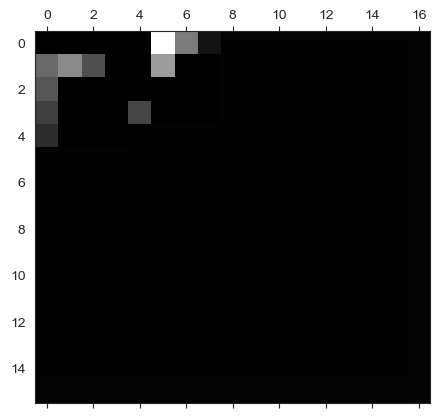

In [40]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap, cmap='gray')
plt.show()

In [42]:
import cv2

(500, 500)


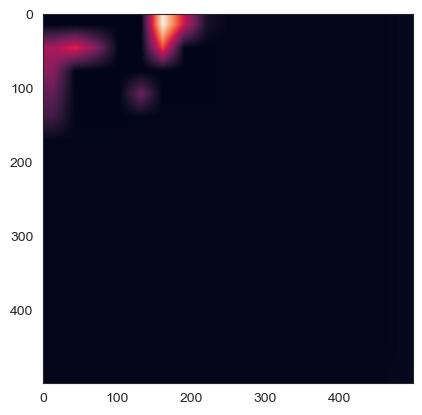

In [43]:
heatmap = cv2.resize(heatmap, (500, 500))
heatmap = np.uint8(255 * heatmap)
plt.imshow(heatmap)
print(heatmap.shape)

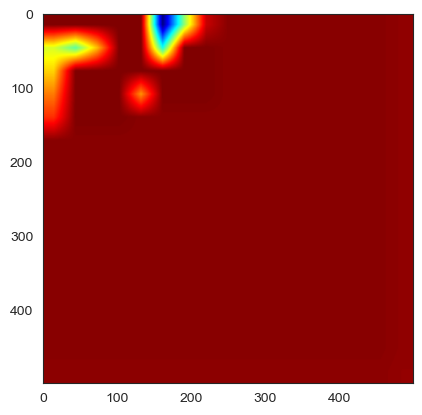

In [44]:
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
plt.imshow(heatmap)